In [69]:
%matplotlib notebook
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Overview
The goal is to show that owners cannot properly identify their animals, and that cats received at shelters are returned to owners from shelters with lower frequency than dogs. This depends in part on the frequency with which cats are likely to interact with the shelter as well as how likely each type of animal is lost. The data will be supported by other publicly available research.

In [46]:
irish_cat_data = pd.read_csv(r"C:\Eamon\Python Studies\Cat Type ID Project\irish_cat_data.csv")

In [77]:
irish_cat_data.count()

county                       10263
sex                          10263
hair_length                  10211
pure_white                   10263
how_white                     9785
other_color                   9696
shape_of_not_orange_cream     7839
dark_or_dilute                9551
breed_known                   9768
breed                        10263
dtype: int64

In [47]:
irish_cat_data.other_color.unique()

array(['Black/Grey', 'Orange/Cream',
       'Part orange/cream and part another colour (tortoiseshell)', nan],
      dtype=object)

In [48]:
irish_cat_data.shape_of_not_orange_cream.unique()

array(['Blotches or whorls', 'Tiger stripes', nan, 'Uniform'],
      dtype=object)

In [49]:
irish_cat_data.dark_or_dilute.unique()

array(['Dark (black or orange)', 'Dilute (blue-grey or cream/yellow)',
       nan], dtype=object)

In [50]:
irish_cat_data.groupby('breed_known').breed_known.count()

breed_known
Burmese (Birman)      61
Other               1281
Siamese               26
Unknown breed       8400
Name: breed_known, dtype: int64

In [51]:
irish_cat_data['breed'] = irish_cat_data.breed.str.lower()

In [86]:
irish_cat_data.groupby('breed').breed.count().sort_values(ascending=False)

breed
unknown breed                                                           8909
domestic shorthair                                                       168
tabby                                                                    148
other                                                                    121
burmese (birman)                                                          61
mongrel                                                                   57
persian                                                                   52
maine coon                                                                47
tortoise shell                                                            38
siamese                                                                   26
british shorthair                                                         22
russian blue                                                              20
norwegian forest                                                      

In [53]:
irish_cat_data.breed.fillna(irish_cat_data.breed_known, inplace=True)
irish_cat_data.breed.fillna('unknown breed', inplace=True)

In [54]:
irish_cat_data.breed = irish_cat_data.breed.str.lower()

In [55]:
pattern = '([a-z\(\) ]*)norwegian([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'norwegian forest'

In [56]:
pattern = '([a-z\(\) ]*)persi([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'persian'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)]

140      persian
201      persian
232      persian
515      persian
1159     persian
1540     persian
1738     persian
2145     persian
2215     persian
2297     persian
2372     persian
2432     persian
2944     persian
3182     persian
3211     persian
3254     persian
3289     persian
3650     persian
3681     persian
4005     persian
4037     persian
4041     persian
4051     persian
4088     persian
4381     persian
4983     persian
5001     persian
5308     persian
5772     persian
5912     persian
6083     persian
6392     persian
6535     persian
7028     persian
7185     persian
7632     persian
7746     persian
8154     persian
8666     persian
8686     persian
8877     persian
9043     persian
9081     persian
9349     persian
9447     persian
9573     persian
9698     persian
9716     persian
9767     persian
9861     persian
9886     persian
10147    persian
Name: breed, dtype: object

In [57]:
pattern = '([a-z\(\) ]*)domestic short([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'domestic shorthair'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)]

239      domestic shorthair
368      domestic shorthair
436      domestic shorthair
505      domestic shorthair
512      domestic shorthair
517      domestic shorthair
568      domestic shorthair
578      domestic shorthair
614      domestic shorthair
677      domestic shorthair
727      domestic shorthair
782      domestic shorthair
826      domestic shorthair
885      domestic shorthair
1055     domestic shorthair
1088     domestic shorthair
1094     domestic shorthair
1113     domestic shorthair
1116     domestic shorthair
1415     domestic shorthair
1555     domestic shorthair
1590     domestic shorthair
1596     domestic shorthair
1671     domestic shorthair
1687     domestic shorthair
1698     domestic shorthair
1729     domestic shorthair
1741     domestic shorthair
1742     domestic shorthair
1878     domestic shorthair
                ...        
7452     domestic shorthair
7578     domestic shorthair
7606     domestic shorthair
7662     domestic shorthair
7671     domestic sh

In [58]:
pattern = '([a-z\(\) ]*)unknown([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'unknown breed'
# irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)]

In [59]:
pattern = '([a-z\(\) ]*)tortoise([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'tortoise shell'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)]

643      tortoise shell
1353     tortoise shell
1519     tortoise shell
1708     tortoise shell
1998     tortoise shell
2047     tortoise shell
2074     tortoise shell
2156     tortoise shell
2456     tortoise shell
2686     tortoise shell
2814     tortoise shell
3017     tortoise shell
3252     tortoise shell
3293     tortoise shell
3503     tortoise shell
4097     tortoise shell
4229     tortoise shell
4299     tortoise shell
4535     tortoise shell
4978     tortoise shell
4982     tortoise shell
5187     tortoise shell
5191     tortoise shell
5203     tortoise shell
5439     tortoise shell
5477     tortoise shell
5722     tortoise shell
6692     tortoise shell
7117     tortoise shell
7152     tortoise shell
7381     tortoise shell
7468     tortoise shell
7700     tortoise shell
8646     tortoise shell
8705     tortoise shell
9041     tortoise shell
10114    tortoise shell
10120    tortoise shell
Name: breed, dtype: object

In [62]:
pattern = '([a-z\(\) ]*)(moggie|moggy)([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'mongrel'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)]

Series([], Name: breed, dtype: object)

In [64]:
pattern = '([a-z\(\) ]*)no breed([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'mongrel'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)]

Series([], Name: breed, dtype: object)

In [90]:
pattern = '([a-z\(\) ]*)bengal tabby([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'bengal'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)]

Series([], Name: breed, dtype: object)

In [92]:
pattern = '([a-z\(\) ]*)tabby([a-z\(\) ]*)'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'tabby'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)].unique()

array(['tabby'], dtype=object)

In [94]:
pattern = '([a-z\(\) ]*)tortoise([a-z\(\) ]*)'
#irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)] = 'tabby'
irish_cat_data.breed[irish_cat_data.breed.str.match(pattern, flags=re.IGNORECASE)].unique()

array(['tortoise shell'], dtype=object)

<IPython.core.display.Javascript object>


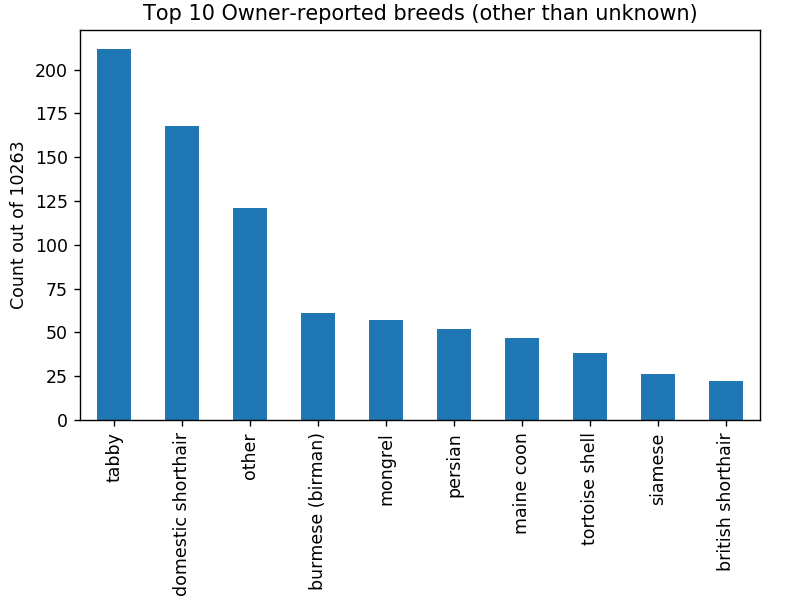

Text(0,0.5,'Count out of 10263')

In [181]:
plt.axes([0.1, 0.3, 0.85, 0.65])
ax = irish_cat_data.groupby('breed').breed.count().sort_values(ascending=False)[1:11].plot(kind='bar', 
                                                                                           title='Top 10 Owner-reported breeds (other than unknown)')
ax.set_ylabel('Count out of 10263')

Note that "Tabby" and "tortoise shell" are not breeds.

In [96]:
austin_intakes = pd.read_csv(r'C:\Eamon\Python Studies\Cat Type ID Project\Austin_Animal_Center_Intakes.csv')

In [97]:
austin_outcomes = pd.read_csv(r'C:\Eamon\Python Studies\Cat Type ID Project\Austin_Animal_Center_Outcomes.csv')

In [99]:
austin_intakes.columns, austin_outcomes.columns

(Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location',
        'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
        'Age upon Intake', 'Breed', 'Color'],
       dtype='object'),
 Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
        'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome',
        'Age upon Outcome', 'Breed', 'Color'],
       dtype='object'))

In [110]:
austin_intakes[:5]

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black
1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby
3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White
4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White


In [111]:
austin_outcomes[austin_outcomes['Animal ID'].isin(austin_intakes[:5]['Animal ID'])]

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
12322,A683644,*Zoey,11/06/2014 10:06:00 AM,11/06/2014 10:06:00 AM,06/13/2014,Adoption,Foster,Dog,Spayed Female,4 months,Border Collie Mix,Brown/White
13672,A750529,NaN,06/01/2017 04:42:00 PM,06/01/2017 04:42:00 PM,12/21/2016,Transfer,Partner,Dog,Spayed Female,5 months,Miniature Schnauzer Mix,White/Cream
35433,A748238,NaN,05/06/2017 03:57:00 PM,05/06/2017 03:57:00 PM,05/01/2014,Transfer,Partner,Dog,Neutered Male,3 years,Bichon Frise Mix,White
40623,A730601,NaN,07/08/2016 09:00:00 AM,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Cat,Neutered Male,7 months,Domestic Shorthair Mix,Blue Tabby
41885,A748291,*Madison,09/04/2017 12:00:00 AM,09/04/2017 12:00:00 AM,06/01/2016,Transfer,Partner,Dog,Spayed Female,1 year,Pit Bull Mix,Black


In [113]:
austin_both = austin_intakes.merge(austin_outcomes[['Animal ID', 'DateTime', 'MonthYear', 'Date of Birth',
        'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome',
        'Age upon Outcome']], on='Animal ID', suffixes=('_in', '_out'))

In [114]:
austin_both

,Animal ID,Name,DateTime_in,MonthYear_in,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTime_out,MonthYear_out,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black,09/04/2017 12:00:00 AM,09/04/2017 12:00:00 AM,06/01/2016,Transfer,Partner,Spayed Female,1 year
1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream,06/01/2017 04:42:00 PM,06/01/2017 04:42:00 PM,12/21/2016,Transfer,Partner,Spayed Female,5 months
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby,07/08/2016 09:00:00 AM,07/08/2016 09:00:00 AM,12/07/2015,Transfer,SCRP,Neutered Male,7 months
3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White,05/06/2017 03:57:00 PM,05/06/2017 03:57:00 PM,05/01/2014,Transfer,Partner,Neutered Male,3 years
4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White,11/06/2014 10:06:00 AM,11/06/2014 10:06:00 AM,06/13/2014,Adoption,Foster,Spayed Female,4 months
5,A676515,Rico,04/11/2014 08:45:00 AM,04/11/2014 08:45:00 AM,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Intact Male,2 months,Pit Bull Mix,White/Brown,04/14/2014 06:38:00 PM,04/14/2014 06:38:00 PM,01/11/2014,Return to Owner,NaN,Neutered Male,3 months
6,A679549,*Gilbert,05/22/2014 03:43:00 PM,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White,06/16/2014 01:54:00 PM,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Neutered Male,2 months
7,A683798,Mustachala,07/21/2016 12:16:00 PM,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,10/18/2016 10:55:00 AM,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Spayed Female,3 years
8,A683798,Mustachala,07/21/2016 12:16:00 PM,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,07/23/2014 06:06:00 PM,07/23/2014 06:06:00 PM,01/15/2013,Adoption,NaN,Spayed Female,1 year
9,A683798,Mustachala,07/15/2014 03:38:00 PM,07/15/2014 03:38:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Female,1 year,Domestic Medium Hair Mix,White/Black,10/18/2016 10:55:00 AM,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Spayed Female,3 years


In [138]:
grouped_outcomes = austin_both[austin_both['Animal Type'].isin(['Dog', 'Cat'])].groupby(['Outcome Type', 'Animal Type'])


In [150]:
grouped_outcomes.describe()

Age upon Intake                        \
                                      count unique      top  freq   
Outcome Type    Animal Type                                         
Adoption        Cat                   14102     42  1 month  3617   
                Dog                   27251     41   1 year  6424   
Died            Cat                     404     35  4 weeks    67   
                Dog                     145     30  2 years    21   
Disposal        Cat                      17      8   1 year     7   
                Dog                      18      8  2 years     6   
Euthanasia      Cat                    1477     44  1 month   198   
                Dog                    1707     36  2 years   377   
Missing         Cat                      30     11  4 weeks     7   
                Dog                      28      8   1 year    10   
Return to Owner Cat                    1713     39  2 years   319   
                Dog                   20320     40  2 years  4013   
Rto-Adopt       Cat                      38     16  2 years    10   
                Dog                     200     24   1 year    63   
Transfer        Cat                   13817     43   1 year  2175   
                Dog                   10932     42   1 year  2001   

                            Age upon Outcome                        Animal ID  \
                                       count unique       top  freq     count   
Outcome Type    Animal Type                                                     
Adoption        Cat                    14102     31  2 months  5261     14102   
                Dog                    27251     31    1 year  6488     27251   
Died            Cat                      404     36   1 month   113       404   
                Dog                      145     36   2 years    20       145   
Disposal        Cat                       17      8    1 year     7        17   
                Dog                       18      7    1 year     6        18   
Euthanasia      Cat                     1477     42   1 month   208      1477   
                Dog                     1707     38   2 years   372      1707   
Missing         Cat                       30     12  2 months     7        30   
                Dog                       28      8    1 year    11        28   
Return to Owner Cat                     1713     35   2 years   322      1713   
                Dog                    20320     39   2 years  3990     20320   
Rto-Adopt       Cat                       38     15   2 years    11        38   
                Dog                      200     20    1 year    63       200   
Transfer        Cat                    13817     43    1 year  2196     13817   
                Dog                    10931     42    1 year  1982     10932   

                                    ...   Outcome Subtype         \
                            unique  ...               top   freq   
Outcome Type    Animal Type         ...                            
Adoption        Cat          11826  ...            Foster   3444   
                Dog          17678  ...            Foster   2579   
Died            Cat            397  ...         In Kennel    209   
                Dog            138  ...         In Kennel     92   
Disposal        Cat             16  ...               NaN    NaN   
                Dog             17  ...               NaN    NaN   
Euthanasia      Cat           1445  ...         Suffering   1324   
                Dog           1478  ...         Suffering    712   
Missing         Cat             28  ...         In Foster     14   
                Dog             15  ...    Possible Theft     19   
Return to Owner Cat           1379  ...               NaN    NaN   
                Dog          11157  ...               NaN    NaN   
Rto-Adopt       Cat             34  ...               NaN    NaN   
                Dog            119  ...               NaN    NaN   
Transfer        Cat 

In [153]:
grouped_outcomes['Animal Type', 'Intake Type'].describe()

Animal Type                    Intake Type         \
                                  count unique  top   freq       count unique   
Outcome Type    Animal Type                                                     
Adoption        Cat               14102      1  Cat  14102       14102      4   
                Dog               27251      1  Dog  27251       27251      4   
Died            Cat                 404      1  Cat    404         404      3   
                Dog                 145      1  Dog    145         145      4   
Disposal        Cat                  17      1  Cat     17          17      1   
                Dog                  18      1  Dog     18          18      3   
Euthanasia      Cat                1477      1  Cat   1477        1477      4   
                Dog                1707      1  Dog   1707        1707      4   
Missing         Cat                  30      1  Cat     30          30      2   
                Dog                  28      1  Dog     28          28      3   
Return to Owner Cat                1713      1  Cat   1713        1713      4   
                Dog               20320      1  Dog  20320       20320      4   
Rto-Adopt       Cat                  38      1  Cat     38          38      2   
                Dog                 200      1  Dog    200         200      3   
Transfer        Cat               13817      1  Cat  13817       13817      4   
                Dog               10932      1  Dog  10932       10932      4   

                                           
                               top   freq  
Outcome Type    Animal Type                
Adoption        Cat          Stray   9286  
                Dog          Stray  17871  
Died            Cat          Stray    336  
                Dog          Stray    105  
Disposal        Cat          Stray     17  
                Dog          Stray     13  
Euthanasia      Cat          Stray   1294  
                Dog          Stray    827  
Missing         Cat          Stray     24  
                Dog          Stray     20  
Return to Owner Cat          Stray   1084  
                Dog          Stray  14662  
Rto-Adopt       Cat          Stray     22  
                Dog          Stray    129  
Transfer        Cat          Stray  11863  
                Dog          Stray   7315

In [158]:
stray_intakes = austin_both[austin_both['Intake Type']=='Stray'].groupby('Animal Type')['Animal Type'].count()
stray_intakes

Animal Type
Bird           168
Cat          23932
Dog          40944
Livestock        6
Other          553
Name: Animal Type, dtype: int64

In [160]:
RTOs = austin_both[austin_both['Outcome Type']=='Return to Owner'].groupby('Animal Type')['Animal Type'].count()
RTOs

Animal Type
Bird             9
Cat           1713
Dog          20320
Livestock        1
Other           41
Name: Animal Type, dtype: int64

<IPython.core.display.Javascript object>


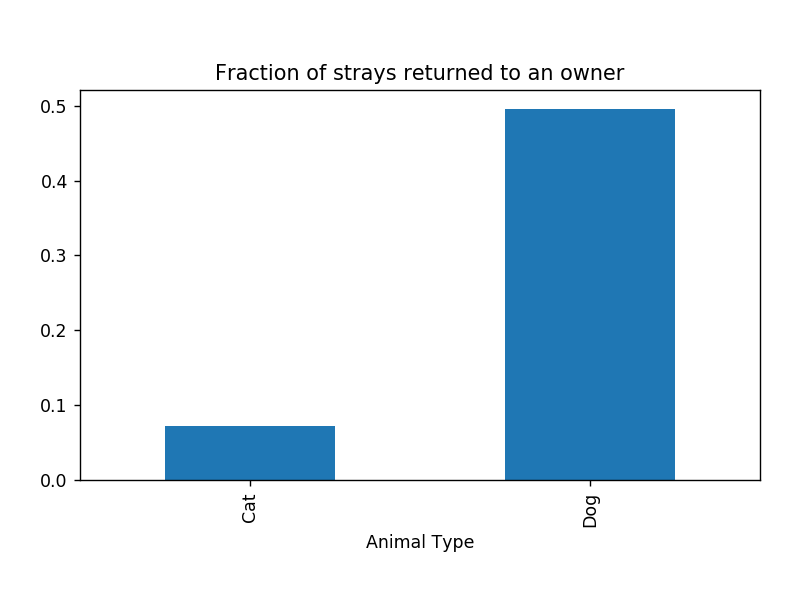

In [180]:
plt.axes([0.1, 0.2, 0.85, 0.65])
ax = (RTOs/stray_intakes)[1:3].plot(kind='bar', title='Fraction of strays returned to an owner')
#ax.set_ylabel()